# Features

Visualizing feature extraction

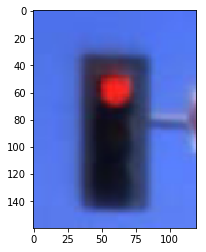

In [3]:
import cv2
import numpy as np
import os, sys, inspect
from matplotlib import pyplot as plt

# Add tl-detector to path so I can import from the project
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir + '/src/') 

# Load and display the sample image
image_path = "../samples/red.png"
image = plt.imread(image_path)
image = cv2.resize(image, None, fx=2.0, fy=2.0)
plt.imshow(image)
plt.show()

## Histogram of Oriented Gradients

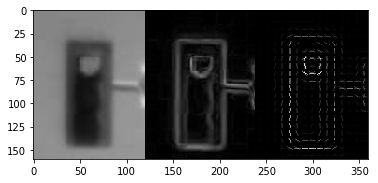

In [4]:
from features import HogDescriptor
from skimage import exposure, filters

hog = HogDescriptor(block_size=(2, 2), cell_size=(8, 8), orientations=9)
fd, hog_image = hog.compute(image, visualize=True)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gradient_image = filters.sobel(gray_image)

# Scale the images to emphasize HOG features
gray_image = exposure.rescale_intensity(gray_image, in_range=(0, 255))
gradient_image = exposure.rescale_intensity(gradient_image, in_range=(0, 50))
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 50))

side_by_side = np.concatenate((gray_image, gradient_image, hog_image), axis=1)
plt.imshow(side_by_side, cmap='gray')
plt.show()

## Local Binary Patterns

## Haar-like Features